# In this Notebook:
- We define global setting for plotting with Seaborn with a custom color palette
containing the colors to be same as our presentation layout
- Plot the distribution of adoption speed by fur color for cats and dogs


## Import Libraries and Dependencies

In [5]:
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


## Global Plot Settings (sns)

In [6]:
# set seaborn options globally
colors = ['#365b6d', '#41c1ba', '#289dd2', '#6c9286', '#f2f1ec', '#fa9939']
custom_palette = sns.set_palette(sns.color_palette(colors))
custom_params = {"axes.facecolor": "#f2f1ec", 
"figure.facecolor": "#f2f1ec",
'figure.titleweight': 'bold',
'figure.titlesize': 28,#'large',
'grid.alpha': 1.0,
'font.size': 16.0,
'font.weight': 'bold',
'axes.labelsize': 16,
'axes.labelcolor': '#365b6d',
'axes.titlepad': 10.0,
'axes.titlesize': 'large',
'xtick.labelsize': 16,
'xtick.color': '#365b6d',
'xtick.bottom': True,
'ytick.labelsize': 16,
'ytick.color': '#365b6d',
'ytick.left': True,
'text.color' : '#365b6d',
'legend.title_fontsize': 12.0,
'legend.frameon': False,
'axes.linewidth': 3,#0.8,
'axes.spines.left': True,
'axes.spines.bottom': True,
'axes.spines.right': True,
'axes.spines.top': True,
'axes.edgecolor': '#365b6d',
'axes.labelweight': 'bold',
'axes.titleweight': 'bold',
}
sns.set_theme(style="white", palette=colors, rc=custom_params)

# custom color palette (color codes taken from our Canva presentation layout): 
colors = ['#365b6d', '#41c1ba', '#289dd2', '#6c9286', '#f2f1ec', '#fa9939']
custom_palette = sns.set_palette(sns.color_palette(colors))
#365b6d - dark blue
#41c1ba - turquoise
#289dd2 - medium blue
#6c9286 - muddy green
#fa9939 - orange 
#f2f1ec - off-white

# display color palette
sns.color_palette()

[(0.21176470588235294, 0.3568627450980392, 0.42745098039215684),
 (0.2549019607843137, 0.7568627450980392, 0.7294117647058823),
 (0.1568627450980392, 0.615686274509804, 0.8235294117647058),
 (0.4235294117647059, 0.5725490196078431, 0.5254901960784314),
 (0.9490196078431372, 0.9450980392156862, 0.9254901960784314),
 (0.9803921568627451, 0.6, 0.2235294117647059)]

## Read in Data

In [7]:
df_eda = pd.read_csv('../data/petfinder-adoption-prediction/df_eda.csv')


## Color Pattern influence on Adoption Speed
- plots not included in presentation

### Dogs

In [8]:
# crosstab of adoptionspeed and color pattern normalized by color pattern to plot:

dog_color_pattern = pd.crosstab(df_eda.query("type==0").color_pattern,df_eda.query("type==0").adoptionspeed,normalize="index")
dog_color_pattern = dog_color_pattern.reset_index()
dog_color_pattern = pd.melt(dog_color_pattern, id_vars='color_pattern', var_name='adoptionspeed', value_name='value')
dog_color_pattern.value = dog_color_pattern.value.round(2)
dog_color_pattern

,color_pattern,adoptionspeed,value
0,0,1,0.18
1,1,1,0.23
2,2,1,0.22
3,0,2,0.27
4,1,2,0.25
5,2,2,0.27
6,0,3,0.25
7,1,3,0.24
8,2,3,0.24
9,0,4,0.29


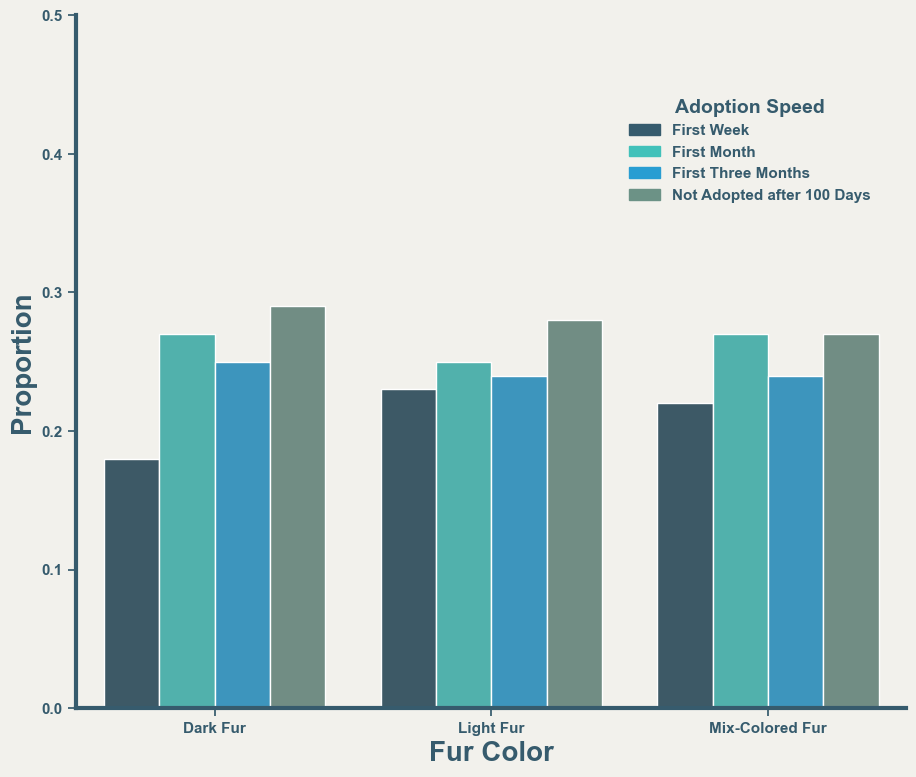

In [11]:
# barplot adoptionspeed and color pattern for dogs:

fig = sns.catplot(
    data=dog_color_pattern, kind="bar",
    x="color_pattern", y="value", hue="adoptionspeed",
    alpha=1, height=8 ,aspect=1.2, legend=False, palette=['#365b6d', '#41c1ba', '#289dd2', '#6c9286'])

plt.tick_params(axis="x", bottom=True, colors='#365b6d')
custom_x_ticks = [0,1,2] 
custom_y_ticks = [0.0,0.1,0.2, 0.3, 0.4, 0.5] 
custom_x_tick_labels = ['Dark Fur', 'Light Fur', 'Mix-Colored Fur'] 
plt.xticks(custom_x_ticks, custom_x_tick_labels, color='#365b6d', fontsize=11)
plt.yticks(custom_y_ticks, color='#365b6d', fontsize=11)
plt.xticks(color='#365b6d', fontsize=11)

# Set x-axis and y-axis titles
plt.xlabel("Fur Color", fontsize=20, color='#365b6d')
plt.ylabel("Proportion", fontsize=20, color='#365b6d')

# Add the legend with custom labels
legend_labels = ['First Week', 'First Month', 'First Three Months', 'Not Adopted after 100 Days']
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(['#365b6d', '#41c1ba', '#289dd2', '#6c9286'], legend_labels)]
plt.legend(handles=legend_handles, title="Adoption Speed", title_fontsize=14, bbox_to_anchor=(0.65, 0.90), loc='upper left')

plt.savefig('../images/color_influence_dogs.jpg')

plt.show();

# color feature:
# 0 = dark
# 1 = light
# 2 = mixed 


### Cats

In [12]:
# crosstab of adoptionspeed and color pattern normalized by color pattern to plot:

cat_color_pattern = pd.crosstab(df_eda.query("type==1").color_pattern,df_eda.query("type==1").adoptionspeed,normalize="index")
cat_color_pattern = cat_color_pattern.reset_index()
cat_color_pattern = pd.melt(cat_color_pattern, id_vars='color_pattern', var_name='adoptionspeed', value_name='value')
cat_color_pattern.value = cat_color_pattern.value.round(2)
cat_color_pattern

,color_pattern,adoptionspeed,value
0,0,1,0.28
1,1,1,0.30
2,2,1,0.28
3,0,2,0.28
4,1,2,0.29
5,2,2,0.28
6,0,3,0.18
7,1,3,0.19
8,2,3,0.19
9,0,4,0.26


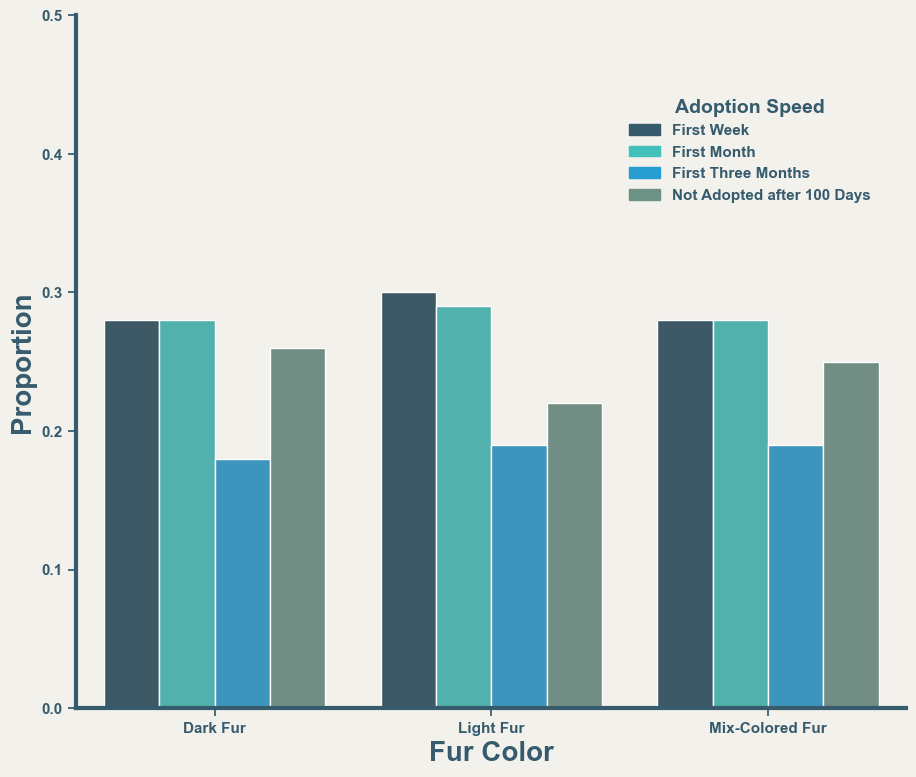

In [14]:
# barplot adoptionspeed and color pattern for cats:

fig = sns.catplot(
    data=cat_color_pattern, kind="bar",
    x="color_pattern", y="value", hue="adoptionspeed",
    alpha=1, height=8 ,aspect=1.2, legend=False, palette=['#365b6d', '#41c1ba', '#289dd2', '#6c9286'])

plt.tick_params(axis="x", bottom=True, colors='#365b6d')
custom_x_ticks = [0,1,2] 
custom_y_ticks = [0.0,0.1,0.2, 0.3, 0.4, 0.5] 
custom_x_tick_labels = ['Dark Fur', 'Light Fur', 'Mix-Colored Fur'] 
plt.xticks(custom_x_ticks, custom_x_tick_labels, color='#365b6d', fontsize=11)
plt.yticks(custom_y_ticks, color='#365b6d', fontsize=11)
plt.xticks(color='#365b6d', fontsize=11)

# Set x-axis and y-axis titles
plt.xlabel("Fur Color", fontsize=20, color='#365b6d')
plt.ylabel("Proportion", fontsize=20, color='#365b6d')

# Add the legend with custom labels
legend_labels = ['First Week', 'First Month', 'First Three Months', 'Not Adopted after 100 Days']
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(['#365b6d', '#41c1ba', '#289dd2', '#6c9286'], legend_labels)]

plt.legend(handles=legend_handles, title="Adoption Speed", title_fontsize=14, bbox_to_anchor=(0.65, 0.90), loc='upper left')

plt.savefig('../images/color_influence_cats.jpg')

plt.show();
# color feature:
# 0 = dark
# 1 = light
# 2 = mixed 